# Phys 41 Homework 4 Jake Anderson 2/10/2024

## Problem 1: Newton's method

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import newton

In [2]:
def func(x):
    return (x - 15) ** 3 * (x + 7) ** 2

Instead of finding the analytical derivative of `func` by hand, I use `sympy.diff()` and then expand the result.

In [3]:
import sympy

x = sympy.symbols("x")
sympy.expand(sympy.diff((x - 15) ** 3 * (x + 7) ** 2))

5*x**4 - 124*x**3 + 282*x**2 + 7740*x - 14175

In [4]:
def func_prime(x):
    return 5 * x**4 - 124 * x**3 + 282 * x**2 + 7740 * x - 14175

/home/jta002/anaconda3/envs/phys41/lib/python3.12/site-packages/scipy/optimize/_zeros_py.py:482: RuntimeWarning: some failed to converge after 1000 iterations
  warnings.warn(msg, RuntimeWarning)
/home/jta002/anaconda3/envs/phys41/lib/python3.12/site-packages/scipy/optimize/_zeros_py.py:474: RuntimeWarning: some derivatives were zero
  warnings.warn(msg, RuntimeWarning)


Numerical and automatic df/dx:
The values of x0 that give -7 as a solution are x <= -0.2020
The values of x0 that give 15 as a solution are x >= 0.2020
The values of x0 for which convergence failed are [1.0101, 1.4141, 1.8182]

Analytical and manual df/dx:
The values of x0 that give -7 as a solution are x <= 1.4141
The values of x0 that give 15 as a solution are x >= 2.2222
The values of x0 for which convergence failed are [1.8182, 2.6263, 3.8384, 4.6465, 5.8586, 7.0707, 8.2828, 9.0909, 9.899, 10.7071, 12.7273, 13.1313, 13.9394, 14.3434, 16.3636, 17.1717, 17.9798, 19.1919]



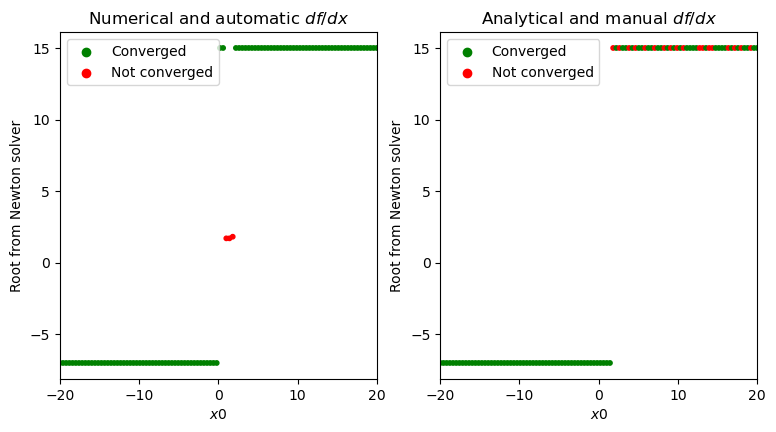

In [5]:
x0s = np.linspace(-20, 20, 100)
zeros, converged, zero_der = newton(func, x0s, maxiter=1000, full_output=True)

conv_to_minus_7 = [
    x0 for i, x0 in enumerate(x0s) if (converged[i] and abs(zeros[i] + 7) <= 0.001)
]
conv_to_15 = [
    x0 for i, x0 in enumerate(x0s) if (converged[i] and abs(zeros[i] - 15) <= 0.001)
]
no_conv = [x0 for i, x0 in enumerate(x0s) if not converged[i]]

print("Numerical and automatic df/dx:")
print(
    f"The values of x0 that give -7 as a solution are x <= {max(conv_to_minus_7):0.4f}"
)
print(f"The values of x0 that give 15 as a solution are x >= {min(conv_to_15):0.4f}")
print(
    f"The values of x0 for which convergence failed are {[round(val, 4) for val in no_conv]}"
    + "\n"
)

fig, (ax1, ax2) = plt.subplots(figsize=(9, 4.5), nrows=1, ncols=2)
colors = ["green" if c else "red" for c in converged]
ax1.scatter(1e6, min(zeros), color="green", label="Converged")
ax1.scatter(1e6, min(zeros), color="red", label="Not converged")
ax1.scatter(x0s, zeros, color=colors, s=10)
ax1.set_title(r"Numerical and automatic $df/dx$")
ax1.set_xlabel(r"$x0$")
ax1.set_ylabel(r"Root from Newton solver")
ax1.set_xlim(left=min(x0s), right=max(x0s))
ax1.legend()

zeros, converged, zero_der = newton(
    func, x0s, fprime=func_prime, maxiter=1000, full_output=True
)

conv_to_minus_7 = [
    x0 for i, x0 in enumerate(x0s) if (converged[i] and abs(zeros[i] + 7) <= 0.001)
]
conv_to_15 = [
    x0 for i, x0 in enumerate(x0s) if (converged[i] and abs(zeros[i] - 15) <= 0.001)
]
no_conv = [x0 for i, x0 in enumerate(x0s) if not converged[i]]

print("Analytical and manual df/dx:")
print(
    f"The values of x0 that give -7 as a solution are x <= {max(conv_to_minus_7):0.4f}"
)
print(f"The values of x0 that give 15 as a solution are x >= {min(conv_to_15):0.4f}")
print(
    f"The values of x0 for which convergence failed are {[round(val, 4) for val in no_conv]}"
    + "\n"
)

colors = ["green" if c else "red" for c in converged]
ax2.scatter(1e6, min(zeros), color="green", label="Converged")
ax2.scatter(1e6, min(zeros), color="red", label="Not converged")
ax2.scatter(x0s, zeros, color=colors, s=10)
ax2.set_title(r"Analytical and manual $df/dx$")
ax2.set_xlabel(r"$x0$")
ax2.set_ylabel(r"Root from Newton solver")
ax2.set_xlim(left=min(x0s), right=max(x0s))
ax2.legend()
fig.show()

In [6]:
def my_newton2(f, fprime, x0, err, maxiter=50, counter=0):
    x1 = x0 - f(x0) / float(fprime(x0))  # new point according to newton
    if abs(x1 - x0) > err and counter < maxiter:  # need the absolute value here
        print(f(x1))
        return my_newton2(
            f, fprime, x1, err, maxiter=maxiter, counter=counter + 1
        )  # repeat if the error is too large
    else:
        return x1


my_newton2(func, func_prime, 1.01010101, 1e-10, maxiter=5)

-31525632.641911216
-10105633.254222166
-3197747.3881002143
-992227.3017176279
-299399.68137767486


-9.442853518976792

## Problem 2: Finding minima

In [7]:
from scipy.interpolate import CubicSpline, PPoly

In [8]:
def func2(x):
    return np.cos(x) * np.sin(x**2) * np.cos(x / 10)

In [9]:
def find_minima(f, domain, n_points=100):
    a, b = domain
    xs = np.linspace(a, b, n_points)
    interpolation = CubicSpline(xs, f(xs))  # Create a differentiable "clone" of f
    deriv = interpolation.derivative()  # Find its first derivative
    extrema = deriv.roots()  # Find roots of the first derivative = find local extrema

    # Get rid of any extrema that were found by wandering out of the domain
    indices_to_delete = []
    for i, val in enumerate(extrema):
        if not a <= val <= b:
            indices_to_delete.append(i)
    extrema = np.delete(extrema, indices_to_delete)
    return min(f(extrema))


find_minima(func2, (0, 50), n_points=10000)

-0.9998535403972358

## Problem 3: Integration

In [10]:
from scipy.integrate import quad

In [11]:
print(quad(lambda x: (1 + x**2) / x, 1, 20))
print(quad(lambda x: np.sin(x) * np.exp(-1 * x) / x, 1, np.inf))
print(quad(lambda x: np.sin(x) / x, 0, 1))

(202.495732273554, 1.3443697455646297e-08)
(0.17932453503941279, 7.620675262588126e-09)
(0.9460830703671831, 1.0503632079297089e-14)
